# Exercise project 4 – RNN/LSTM for time series forecasting (Example from Kaggle)

I wanted to see how a basic LSTM model would work with a simple dataset before moving on to more complex models. The code I found demonstrates how to train an LSTM model on artificially generated sine wave data to predict the continuation of the wave (i.e., time series forecasting). This notebook is a good introduction to how LSTMs process sequential data.


https://www.kaggle.com/code/carlmcbrideellis/lstm-time-series-prediction-sine-wave-example

### Step 0: Importing libraries and loading the dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm.keras import TqdmCallback
import keras
import warnings
warnings.filterwarnings("ignore")

# random seed for reproducibility.
# ensures that model training and splits stay the same
seed = 101
keras.utils.set_random_seed(seed)

### Step 1: Data preparations and visualisations

The notebook uses artificially generated data points based on the sine function. The goal is to have the model learn the underlying pattern and predict future points beyond the training dataset.

In [ ]:
X_train = np.arange(0,100,0.5) # create training data as a range of numbers
y_train = np.sin(X_train) # apply sine function

X_test = np.arange(100,200,0.5)
y_test = np.sin(X_test)

# n features for reshaping (1 feature per time step)
n_features = 1

# reshape training data to match input shape (samples, features)
train_series = y_train.reshape((len(y_train), n_features))
test_series  = y_test.reshape((len(y_test), n_features))

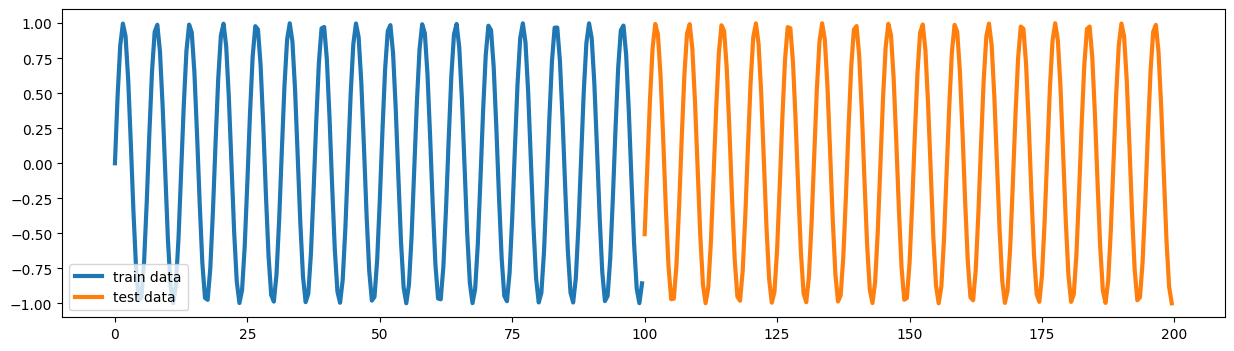

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(X_train,y_train, lw=3, label='train data') # plot training data (sine curve)
ax.plot(X_test, y_test,  lw=3, label='test data') # plot testing data
ax.legend(loc="lower left") # add legend (bottom left)
plt.show();

The Time Series Generator was configured with a look_back of 20, meaning it used the previous 20 time steps to predict the next value, with a batch size of 1.

In [ ]:
# how many previous time steps (look_back) to use for predicting the next step
look_back  = 20

# generator for training / testing data
# uses train_series to predict itself (autoregession)
# - length: n previous steps (look_back)
# - sampling_rate: use every step (no skipping)
# - stride: 1 step at a time
# - batch_size: 1 sequence per batch

train_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(train_series, train_series,
                                      length        = look_back,
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 1)

test_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(test_series, test_series,
                                      length        = look_back,
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 1)

### Step 3: Model Architecture

In [ ]:
n_neurons  = 2 # n neurons in the LSTM layer

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(look_back, n_features)))
model.add(tf.keras.layers.LSTM(n_neurons))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse') # mse = mean squared error loss

initial_weights = model.get_weights()
model.fit(
    train_generator,
    epochs=300,
    verbose=0, # suppress Keras default output
    callbacks=[TqdmCallback(verbose=1)] # show clean tqdm progress bar
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

### Step 4: Model Evaluation

In [ ]:
test_predictions  = model.predict(test_generator)

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


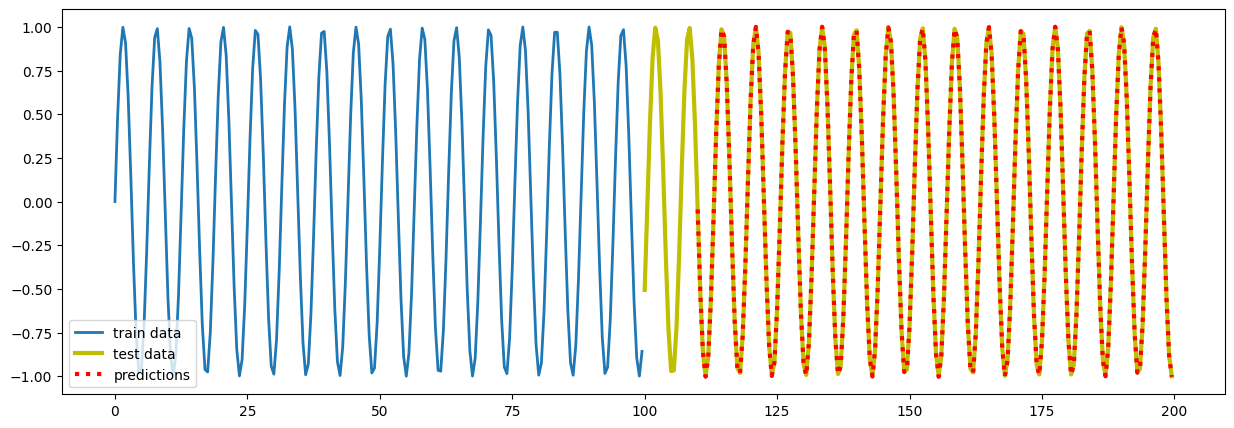

In [ ]:
x = np.arange(110,200,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,test_predictions, lw=3, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.show();

### Extrapolation

Extrapolation is the process of predicting future data points beyond the range of the observed dataset.



*   model uses the LSTM to generate new predictions step-by-step
*   each prediction is added to the sequence
*   then, the updated sequence is fed back to the model (new prediciton)
*   helps test how well the model can predict data trends beyond the training and test datasets





In [ ]:
extrapolation = list()
# use the first 'look_back' values from the test data as the initial seed
seed_batch    = y_test[:look_back].reshape((1,look_back, n_features))
current_batch = seed_batch

# extrapolate the next 180 values
for i in range(180):
    predicted_value = model.predict(current_batch, verbose=None)[0] # predict the next value using the current batch
    extrapolation.append(predicted_value) # append the predicted value to the extrapolation list
    current_batch = np.append(current_batch[:,1:,:],[[predicted_value]],axis=1) # update the current batch by removing the first value and adding the predicted value

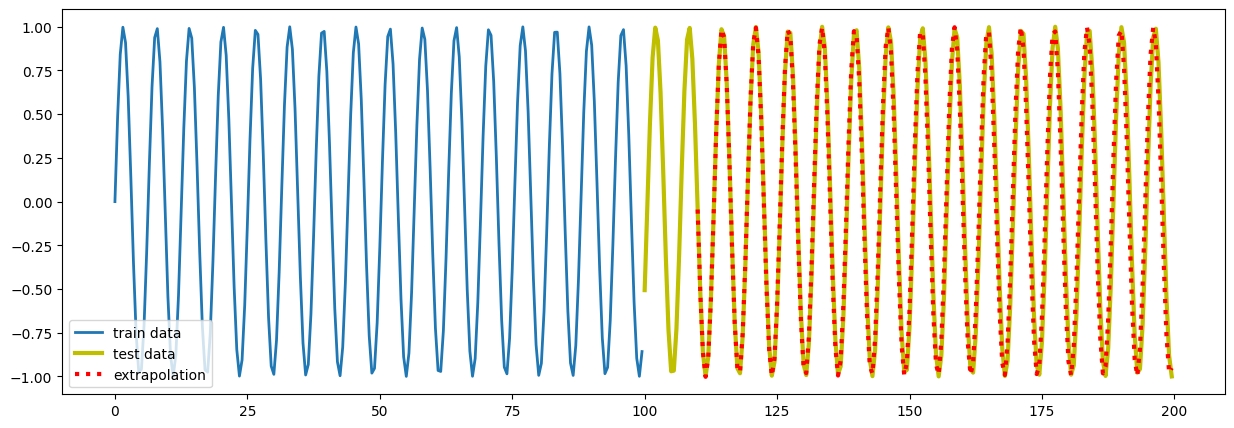

In [ ]:
x = np.arange(110,200,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,extrapolation, lw=3, c='r',linestyle = ':', label='extrapolation') # plot extrapolated data (predicted values)
ax.legend(loc="lower left")
plt.show();

### Sine wave + 3rd harmonic + 5th harmonic

This part of the code creates a sine wave with additional 3rd and 5th harmonics for both training



*   3rd harmonic:
sin
⁡
(
3
𝑋
)
/
3
sin(3X)/3

 5th harmonic:
sin
⁡
(
5
𝑋
)
/
5
sin(5X)/5
*   Adding harmonics makes the sine wave more complex



In [ ]:
X_train = np.arange(0,50,0.5)
y_train = np.sin(X_train) + np.sin(3*X_train)/3 + np.sin(5*X_train)/5

X_test  = np.arange(50,100,0.5)
y_test  = np.sin(X_train) + np.sin(3*X_train)/3 + np.sin(5*X_train)/5

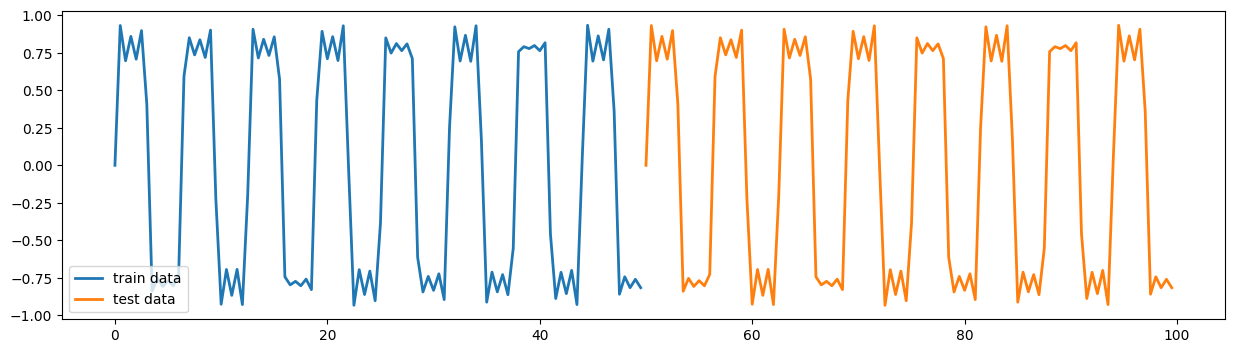

In [ ]:
train_series = y_train.reshape((len(y_train), n_features))
test_series  = y_test.reshape((len(y_test), n_features))
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test, y_test,  lw=2, label='test data')
ax.legend(loc="lower left")
plt.show();

In [ ]:
train_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(train_series, train_series,
                                      length        = look_back,
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 1)

test_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(test_series, test_series,
                                      length        = look_back,
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 1)

model.set_weights(initial_weights) # re-set the weights
model.fit(
    train_generator,
    epochs=300,
    verbose=0,
    callbacks=[TqdmCallback(verbose=1)]
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


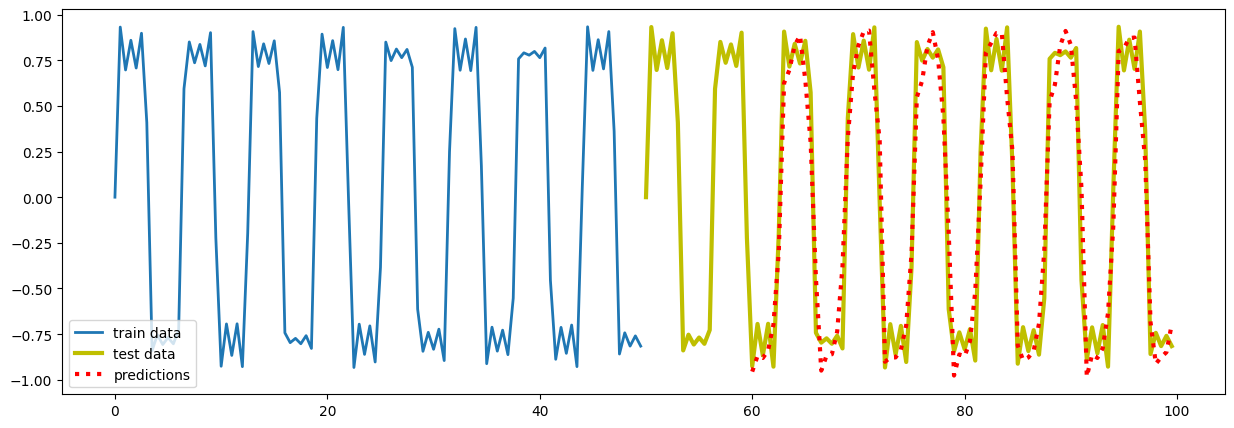

In [ ]:
test_predictions  = model.predict(test_generator)
x = np.arange(60,100,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,test_predictions, lw=3, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.show();

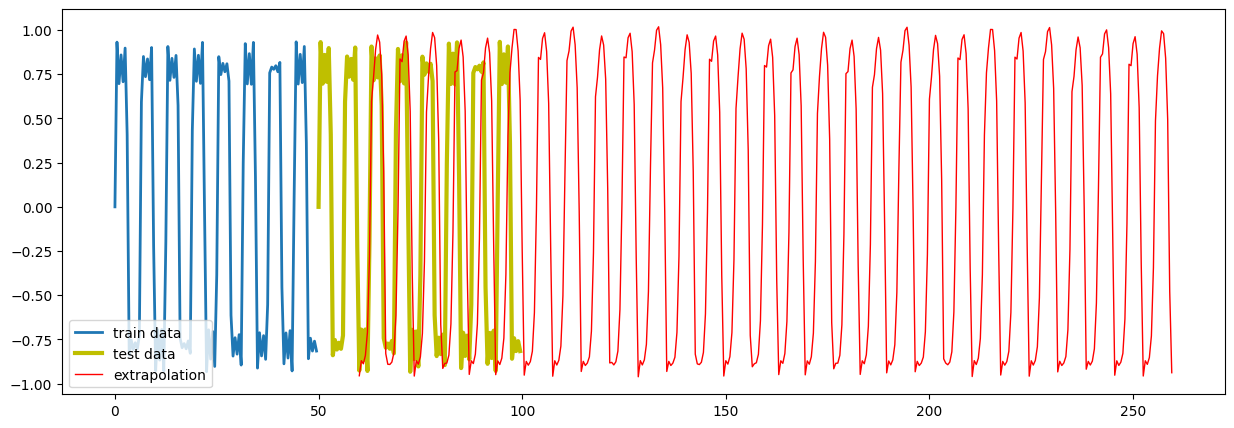

In [ ]:
extrapolation = list()
seed_batch    = y_test[:look_back].reshape((1,look_back, n_features))
current_batch = seed_batch

# extrapolate the next 180 values
for i in range(400):
    predicted_value = model.predict(current_batch, verbose=None)[0]
    extrapolation.append(predicted_value)
    current_batch = np.append(current_batch[:,1:,:],[[predicted_value]],axis=1)

# plot
x = np.arange(60,260,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(X_train,y_train, lw=2, label='train data')
ax.plot(X_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,extrapolation, lw=1, c='r', label='extrapolation')
ax.legend(loc="lower left")
plt.show();

### Personal Analysis / Refelection


The model had a very low training loss of 1.06e-5, meaning it learned the pattern well. It was also able to make smooth and accurate predictions beyond the test data range, continuing the sine wave correctly (Extrapolation).

The model was trained on a simple pattern, a sine wave, which made it easy to learn and predict. Even with just 2 neurons in the LSTM layer, it was able to capture the pattern well. It also handled extrapolation effectively, which is impressive for such a simple model.

There was also an example which used a more complex signal, that was created using the sine wave combined with 3rd and 5th harmonics, whcih was an interesting experiment.
